#  Welcome to my data analysis project on stock market analysis and in this Project we will be analysing different oil companies stocks and answer a few question statements related to them using different data analysis tool offered by Python

# Following are our Question statements
# 1.) What was the change in price of the stock over time?
# 2.) What was the moving average of the various stocks?
# 3.) What was the daily return of the stock on average?
# 4.) What was the correlation between different stockson the basis of daily returns?
# 5.) What was the correlation between different stocks on the basis of Closing Price?
# 6.) How much value do we put at risk by investing in a particular stock?
# 7.) How can we attempt to predict future stock behavior?

# So , Let's get Started 


In [100]:
# Lets import all the libraries we need before diving in
import pandas as pd
from pandas import Series , DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style('whitegrid') # For an appealing whitegrid background of our seaborn plots
%matplotlib inline



# ---------------------------------------------------------------------------------------------------------------
# 1.) Change in price of the stock over time

In [101]:
# Now to read stock data directly from the web we  need to import datareader
from pandas_datareader import data as pdr



In [102]:
# For Time Stamps
from datetime import datetime

In [103]:
# Creating a list of oil companies stocks

oil_list=['ONGC.NS','IOC.NS','HINDPETRO.NS','OIL.NS']

In [104]:
# Now lets add our time period of analysis

end= datetime.now()
start= datetime(end.year-1,end.month,end.day)

In [105]:
# Getting oil companies stocks data directly from Yahoo finance

stocks=pdr.get_data_yahoo(oil_list,start,end) # All the companies in one DataFrame
ongc=pdr.get_data_yahoo(['ONGC.NS'],start,end)
iocl=pdr.get_data_yahoo(['IOC.NS'],start,end)
hpcl=pdr.get_data_yahoo(['HINDPETRO.NS'],start,end)
oil=pdr.get_data_yahoo(['OIL.NS'],start,end)

    

In [106]:
# Small preview of the data gathered

stocks.head()


Attributes   Adj Close                                           Close  \
Symbols        ONGC.NS     IOC.NS HINDPETRO.NS      OIL.NS     ONGC.NS   
Date                                                                     
2021-08-18  103.885788  63.826187   253.800003  155.382294  113.199997   
2021-08-20  101.132637  62.203480   247.199997  158.042465  110.199997   
2021-08-23  102.555099  61.902988   245.649994  159.752579  111.750000   
2021-08-24  103.885788  63.645885   249.750000  162.555252  113.199997   
2021-08-25  106.134216  63.766087   257.850006  167.258057  115.650002   

Attributes                                            High             ...  \
Symbols        IOC.NS HINDPETRO.NS      OIL.NS     ONGC.NS     IOC.NS  ...   
Date                                                                   ...   
2021-08-18  70.800003   253.800003  163.550003  115.250000  71.000000  ...   
2021-08-20  69.000000   247.199997  166.350006  111.750000  70.333336  ...   
2021-08-23  68.666664   245.649994  168.149994  112.000000  69.933334  ...   
2021-08-24  70.599998   249.750000  171.100006  115.199997  70.800003  ...   
2021-08-25  70.733330   257.850006  176.050003  117.199997  71.300003  ...   

Attributes          Low                    Open                          \
Symbols    HINDPETRO.NS      OIL.NS     ONGC.NS     IOC.NS HINDPETRO.NS   
Date                                                                      
2021-08-18   251.600006  161.300003  113.900002  70.933334   254.699997   
2021-08-20   246.100006  161.600006  110.650002  70.300003   251.949997   
2021-08-23   244.500000  166.449997  110.349998  69.933334   248.899994   
2021-08-24   246.000000  169.100006  113.150002  69.266663   247.000000   
2021-08-25   250.100006  171.449997  113.500000  71.000000   250.350006   

Attributes                  Volume                                      
Symbols         OIL.NS     ONGC.NS      IOC.NS HINDPETRO.NS     OIL.NS  
Date                                                                    
2021-08-18  168.000000  10074307.0  18888795.0    2964155.0   857655.0  
2021-08-20  162.000000  23878081.0  15736258.0    2944433.0   612149.0  
2021-08-23  167.199997  16886027.0  10432123.0    2314084.0  1501011.0  
2021-08-24  170.000000  17368602.0  17847588.0    2484830.0  1035768.0  
2021-08-25  172.000000  18637317.0  11312487.0    3263773.0  1822116.0  

[5 rows x 24 columns]

In [107]:
# Let's Start Analyzing from ONGC Stocks

ongc.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,145.202196,150.799397,153.474699,148.492972,151.054618,2.500709e+07
std,17.430586,16.901422,17.454638,16.775126,17.184726,2.133471e+07
min,101.132637,110.199997,111.750000,108.500000,110.349998,1.114216e+06
25%,133.518646,137.750000,139.899994,135.050003,138.050003,1.293435e+07
50%,146.711716,153.500000,156.000000,151.250000,153.949997,1.873652e+07
75%,159.625275,164.750000,167.449997,162.750000,165.250000,2.876619e+07
max,182.599213,186.949997,194.949997,177.800003,190.000000,1.658603e+08


In [108]:
ongc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-08-18 to 2022-08-18
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ONGC.NS)  249 non-null    float64
 1   (Close, ONGC.NS)      249 non-null    float64
 2   (High, ONGC.NS)       249 non-null    float64
 3   (Low, ONGC.NS)        249 non-null    float64
 4   (Open, ONGC.NS)       249 non-null    float64
 5   (Volume, ONGC.NS)     249 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


<AxesSubplot:xlabel='Date'>

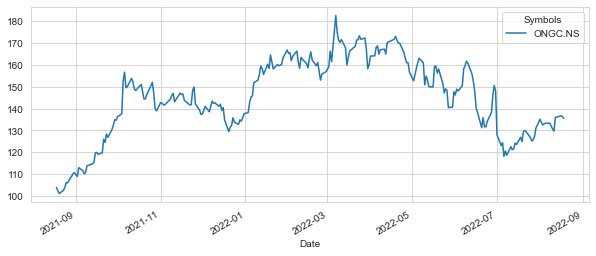

In [109]:
# Let's plot the Adjusted Close price of the ONGC Stocks for a little visualization

ongc['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

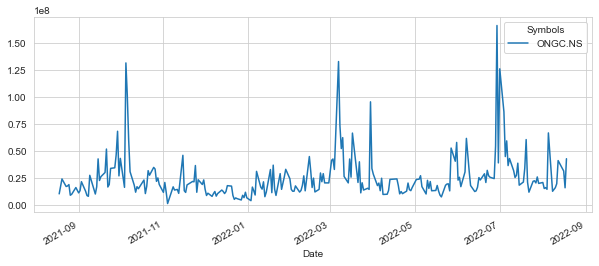

In [110]:
# Lets plot the volume traded for ONGC Stocks

ongc['Volume'].plot(legend=True,figsize=(10,4))

# ---------------------------------------------------------------------------------------------------------------
# 2.) Moving average of the various stocks

In [111]:
# Now lets move on to calculating moving averages for 7 days,15 days, 30 days 

ongc['MA for 7 Days']= ongc['Adj Close'].rolling(7).mean()
ongc['MA for 15 Days']= ongc['Adj Close'].rolling(15).mean()
ongc['MA for 30 Days']= ongc['Adj Close'].rolling(30).mean()



<AxesSubplot:xlabel='Date'>

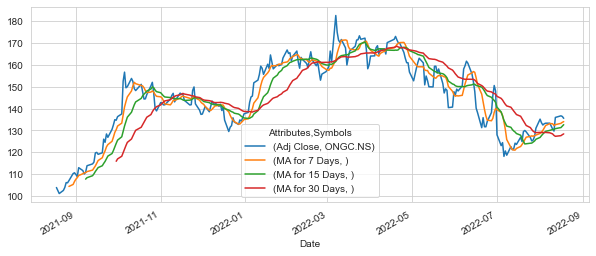

In [112]:
#Now lets plot all the moving averages

ongc[['Adj Close','MA for 7 Days','MA for 15 Days','MA for 30 Days']].plot(figsize=(10,4),subplots=False)

# The moving average indicator is a very important tool in predicting the support and resistance level of the stocks 
# The moving average indicator is not severely affected by daily fluctuations and help us determine the trend of the stock


# ---------------------------------------------------------------------------------------------------------------
# 3.) Daily return of the stock 

<AxesSubplot:xlabel='Date'>

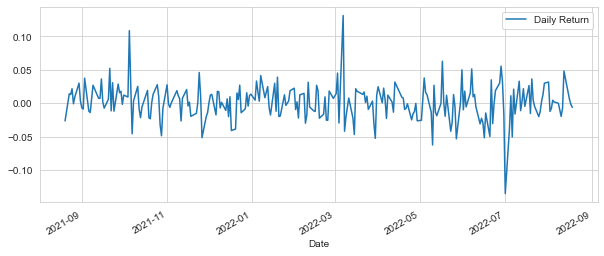

In [113]:
# Lets make a new column for our daily return in  ongc stocks DataFrame

ongc['Daily Return']=ongc['Adj Close'].pct_change()
ongc['Daily Return'].plot(figsize=(10,4),legend=True)


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

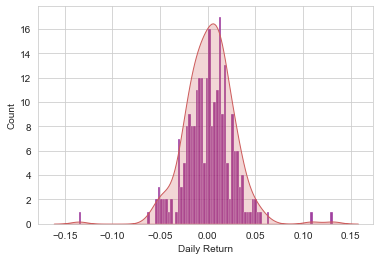

In [114]:
# Lets make a histogram and kernel density estimation overlappping plot for our daily return for better visualization

sns.histplot(ongc['Daily Return'].dropna(),bins=100,color='purple')
sns.kdeplot(ongc['Daily Return'].dropna(),color='indianred',shade=True)

In [115]:
# Lets Create another dataframe of all the oil companies with there adjusted closing recorded in a single DataFrame

closing_df=stocks.loc[:,"Adj Close"]

In [116]:
closing_df.head()

Symbols,ONGC.NS,IOC.NS,HINDPETRO.NS,OIL.NS
Date,,,,
2021-08-18,103.885788,63.826187,253.800003,155.382294
2021-08-20,101.132637,62.203480,247.199997,158.042465
2021-08-23,102.555099,61.902988,245.649994,159.752579
2021-08-24,103.885788,63.645885,249.750000,162.555252
2021-08-25,106.134216,63.766087,257.850006,167.258057


In [117]:
#Now to calculate all the oil companies daily return

oil_rets=closing_df.pct_change()

In [118]:
oil_rets.head()

Symbols,ONGC.NS,IOC.NS,HINDPETRO.NS,OIL.NS
Date,,,,
2021-08-18,NaN,NaN,NaN,NaN
2021-08-20,-0.026502,-0.025424,-0.026005,0.017120
2021-08-23,0.014065,-0.004831,-0.006270,0.010821
2021-08-24,0.012975,0.028155,0.016690,0.017544
2021-08-25,0.021643,0.001889,0.032432,0.028930


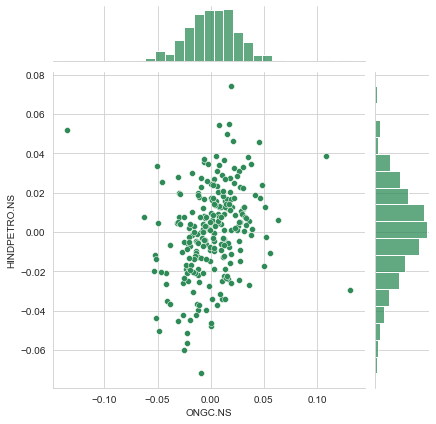

In [119]:
# Now lets compare the stocks price of ONGC Stocks and HPCL Stocks on the same timeframe

sns.jointplot(data=oil_rets,x='ONGC.NS',y='HINDPETRO.NS',kind='scatter',color='seagreen')

# So  we can see there is an abrupt correlation between the oil stocks though not very sharp and a few outliers could also be seen

# ---------------------------------------------------------------------------------------------------------------
# 4.) Correlation between different stocks on basis of daily returns

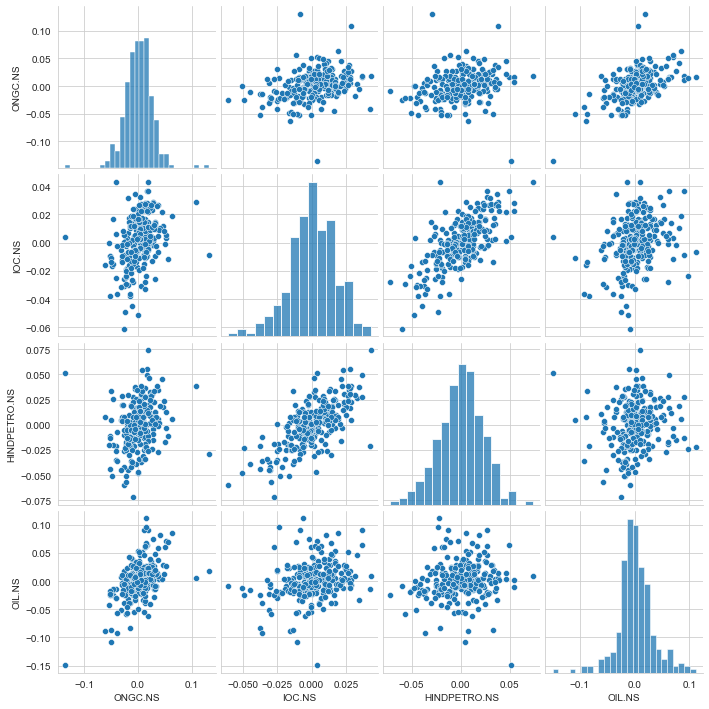

In [120]:
#  Now lets take all our oil stocks and compare them all at once using their daily return

sns.pairplot(oil_rets.dropna())

# Now by normal visuals we can see there seems to be a little correlation between IOCL and HPCL stocks

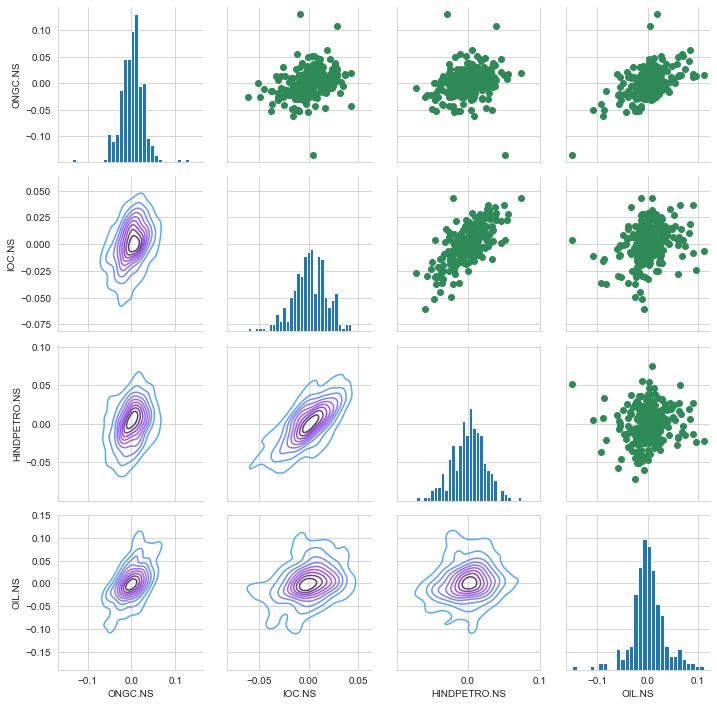

In [121]:
# Now lets reconfirm our deduction with a little help from KDE plot

returns_fig = sns.PairGrid(oil_rets.dropna())

returns_fig.map_upper(plt.scatter,color='seagreen')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

# Now we can clearly see that HPCL and IOCl stocks are highly correlated on the basis of daily return

# ---------------------------------------------------------------------------------------------------------------
# 5.) correlation between different stocks on the basis of Closing Price

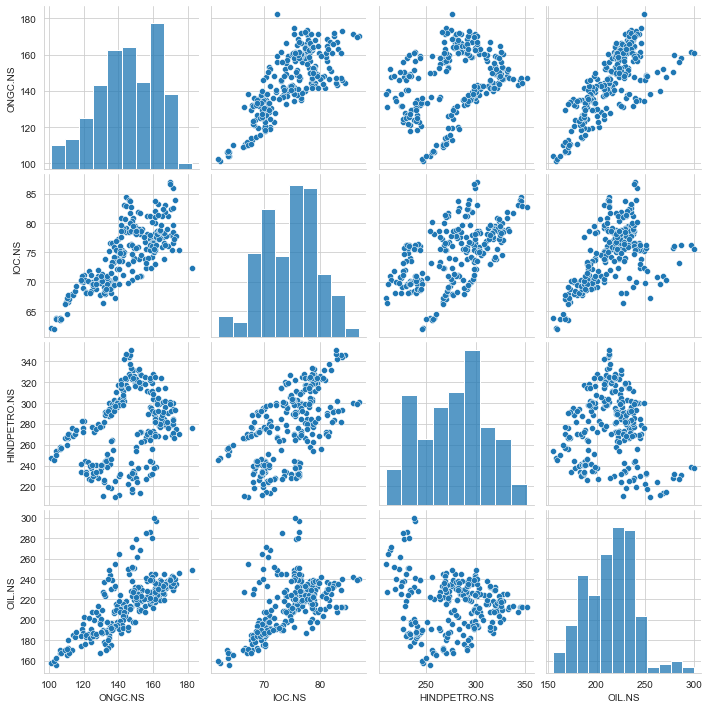

In [122]:
sns.pairplot(closing_df.dropna())

# As we can see there is a little correlation between OIL and ONGC Stocks on the basis of their Closing price

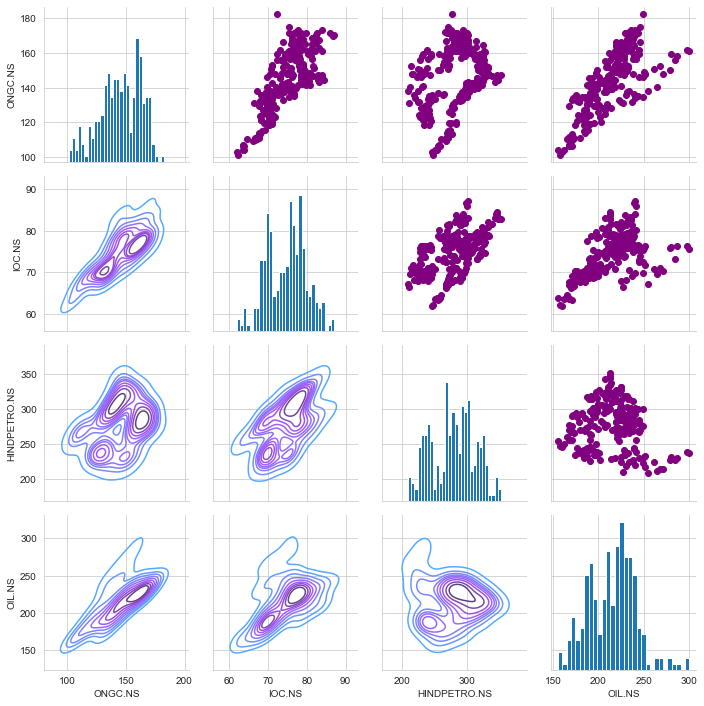

In [123]:
# Lets Reconfirm our deduction using KDE plot

closing_fig = sns.PairGrid(closing_df.dropna())

closing_fig.map_upper(plt.scatter,color='purple')

closing_fig.map_lower(sns.kdeplot,cmap='cool_d')

closing_fig.map_diag(plt.hist,bins=30)

# As we reconfirmed there is high correlation between ONGC and OIL stocks by looking at there KDE plot

# ---------------------------------------------------------------------------------------------------------------
# 6.) Risk Analysis

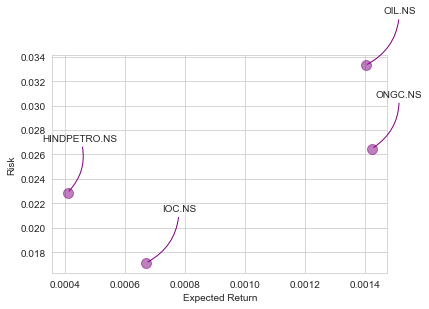

In [124]:
# Let's do a Basic Risk analysis first

rets=oil_rets.dropna()
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =100,color='purple')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',color='purple', connectionstyle = 'arc3,rad=-0.3'))


# As we can see from the above basic risk analysis
# 1.) ONGC Stocks give the highest return for average risk
# 2.) IOCL Stocks offer the lowest risk
# 3.) HPCL Stocks has lowest expected return
# 4.) OIL Stocks have the highest risk but fairly good return

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

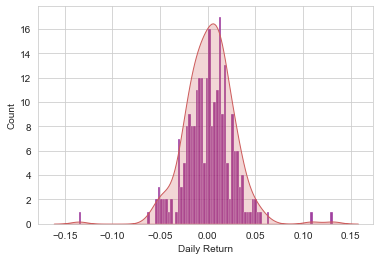

In [125]:
# Now lets do a fairly deep risk analysis using quantiles

sns.histplot(ongc['Daily Return'].dropna(),bins=100,color='purple')
sns.kdeplot(ongc['Daily Return'].dropna(),color='indianred',shade=True)

In [126]:
 rets.head()

Symbols,ONGC.NS,IOC.NS,HINDPETRO.NS,OIL.NS
Date,,,,
2021-08-20,-0.026502,-0.025424,-0.026005,0.017120
2021-08-23,0.014065,-0.004831,-0.006270,0.010821
2021-08-24,0.012975,0.028155,0.016690,0.017544
2021-08-25,0.021643,0.001889,0.032432,0.028930
2021-08-26,-0.000865,-0.004713,-0.009114,0.020449


In [127]:
cname=['ONGC.NS','IOC.NS','HINDPETRO.NS','OIL.NS']
quantile_list=[]
for a in cname:
    quantile_list.append(rets[a].quantile(0.05))
quantile_df=DataFrame(quantile_list,index=['ONGC','IOCL','HPCL','OIL'],columns=['Quantile Value'])
quantile_df

,Quantile Value
ONGC,-0.041621
IOCL,-0.030003
HPCL,-0.039439
OIL,-0.051066


# So from the above we came to know about the 0.05 empirical quantile of daily return of all our oil stocks
# Simplifying with 95% confidence our loss will not be more than the quantile value of each oil stock for their respective investment 
# For Example if we invest Rs 10000 in ONGC stocks with 95 % confidence we can say that our loss will not exceed 0.041621*10000=Rs 416.21

# ---------------------------------------------------------------------------------------------------------------

# Now we will improve aur accuracy even more by using Monte Carlo method which will take into account the shock factor that could hit the stock price

# we have done a lot of work on ONGC stocks lets take into account HPCL stocks for our prediction in the Monte Carlo method 


In [128]:
# Let's define our variables

days=365
dt=1/days
mu=rets['HINDPETRO.NS'].mean()
sigma=rets['HINDPETRO.NS'].std()

In [129]:
# Lets define our Monte Carlo function 
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range (1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    

In [130]:
hpcl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS
Date,,,,,,
2021-08-18,253.800003,253.800003,255.800003,251.600006,254.699997,2964155
2021-08-20,247.199997,247.199997,252.750000,246.100006,251.949997,2944433
2021-08-23,245.649994,245.649994,250.699997,244.500000,248.899994,2314084
2021-08-24,249.750000,249.750000,250.899994,246.000000,247.000000,2484830
2021-08-25,257.850006,257.850006,259.500000,250.100006,250.350006,3263773


# So for HPCL  our starting price is 254.699997

Text(0.5, 1.0, 'Monte Carlo Analysis for HPCL')

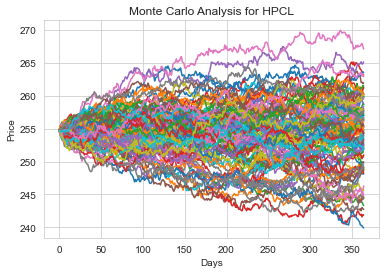

In [131]:
# Now as we have already defined our function above lets use it

start_price=254.699997

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for HPCL')

# So now we have our Monte Carlo plot for HPCL but it's ver hard to decipher anything from this so lets make it more simple and understandable

In [132]:
# Lets run the above function 10000 times for more accurate results

runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1];

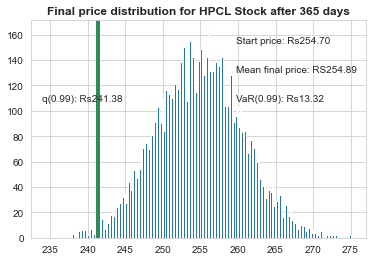

In [133]:
# Now lets define our 1% quantile , this basically means that 99% of the values should fall between here

quant=np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: Rs%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: RS%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): Rs%.2f" % (start_price - quant,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): Rs%.2f" % quant)

# Plot a line at the 1% quantile result
plt.axvline(x=quant, linewidth=4, color='seagreen')

# Title
plt.title(u"Final price distribution for HPCL Stock after %s days" % days, weight='bold');

# So here is our most accurate risk analysis plot for HPCL For 365 days 

# So lets break down what information we got from the last plot

# If you purchase 1 stock of HPCL at its starting price of Rs 254.70 at an average you will have the final price of it as Rs  254.93 which basically indicates that it is a very stable stock which was also confirmed in our very first basic risk analysis

# Taking into the risk consideration of shock factors that could hit the stock with 99% confidence we can say that our loss for a single day would not be more than Rs. 13.03 per stock if bought at Rs 254.70

# --------------------------------------------------------------------------------------------------------------


# Thank you for being with me till the end 

# Regards : Mihir